### Ball to ball prediction

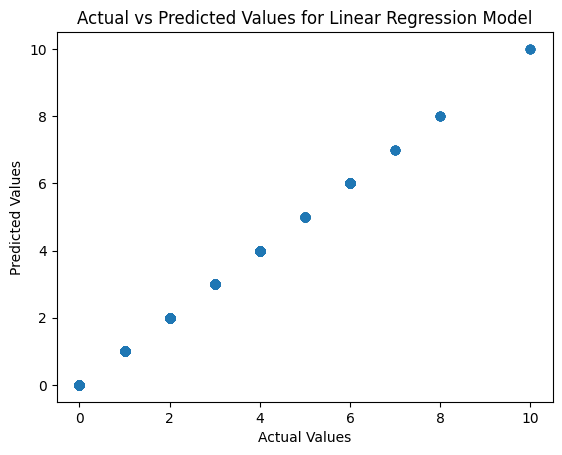

0.9999999999999923
1.0000000000000113
1.9999999999999951
4.141284354196768e-15
1.000000000000007
5.999999999999984
0.9999999999999947
0.9999999999999943
1.0477613405361935e-16
0
2.3106334888681205e-14
0.9999999999999949
0
0
1.0000000000000093
0.9999999999999902
1.0000000000000013
3.8073327931423554e-15
0.9999999999999966
0.9999999999999988
4.000000000000001
1.199466314070905e-14
2.299925044834286e-15
0
1.0000000000000064
1.0000000000000009
0
0.999999999999999
0.9999999999999889
1.0000000000000062
3.999999999999993
0.9999999999999892
3.9999999999999964
0
1.0000000000000089
0.9999999999999957
1.0000000000000138
0
0.9999999999999984
1.999999999999999
6.014331529166217e-16
1.000000000000011
1.0000000000000064
2.2932465535137566e-15
9.809772848214296e-15
4.81118912150162e-15
3.9999999999999973
3.9999999999999947
0.9999999999999961
0
0
5.999999999999986
7.604094487629038e-15
1.0000000000000024
1.9879597062254166e-15
2.524321069983716e-15
5.414455550248772e-15
4.000000000000001
2.999999999999

In [10]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Load the dataset
deliveries = pd.read_csv('deliveries.csv')
 
# Label encode all categorical columns
le = LabelEncoder()
deliveries['batting_team'] = le.fit_transform(deliveries['batting_team'])
deliveries['bowling_team'] = le.fit_transform(deliveries['bowling_team'])
deliveries['batsman'] = le.fit_transform(deliveries['batsman'])
deliveries['non_striker'] = le.fit_transform(deliveries['non_striker'])
deliveries['bowler'] = le.fit_transform(deliveries['bowler'])
deliveries['player_dismissed'] = le.fit_transform(deliveries['player_dismissed'])
deliveries['dismissal_kind'] = le.fit_transform(deliveries['dismissal_kind'])
deliveries['fielder'] = le.fit_transform(deliveries['fielder'])

# Drop any rows with missing values
deliveries.dropna(inplace=True)

# Create X and y arrays for training and testing
X = deliveries.drop(['total_runs'], axis=1)
y = deliveries['total_runs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Convert negative y_pred values to 0
y_pred = [0 if x < 0 else x for x in y_pred]


    
# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Linear Regression Model')
plt.show()

# Evaluate the model
#print("R-squared value:", lr_model.score(X_test, y_test))
for rrrr in y_pred:
    print(rrrr)

In [25]:
from sklearn.metrics import r2_score, accuracy_score, precision_score, explained_variance_score, f1_score, mean_squared_error

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

# Print the performance metrics
print("Mean Squared Error: {:.3f}".format(mse))
print("R-squared: {:.3f}".format(r2))
print("Explained Variance Score: {:.3f}".format(evs))


Mean Squared Error: 0.000
R-squared: 1.000
Explained Variance Score: 1.000


### Best batsman

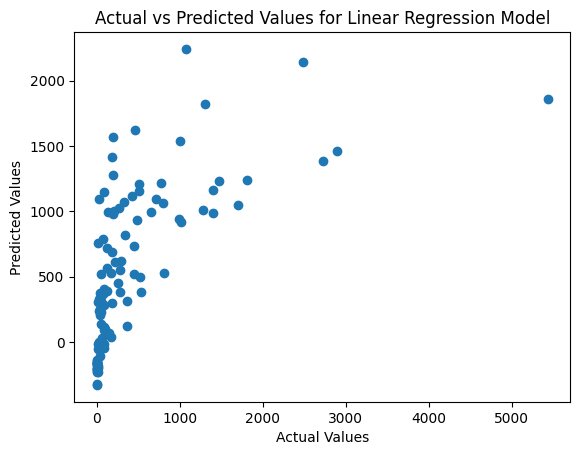

[ 307.16191173   34.31959509  524.85667859  990.62437046  112.18413789
 -322.72137398 1116.49409007  982.69626841 1098.65799747  920.84881203
  623.95573851  136.5702576  1066.14788245  687.93508643  -56.774161
 -203.51825938 1162.90538687 1413.90826035  226.9930952  1070.1224357
 1230.94409623   66.81742297 1051.74072705  611.25291418  375.13624224
  455.84728524 -203.51825938  405.17945852  -52.6034411   311.22906604
 2243.70982991 1154.22504461 1621.02750909  121.89132051 1461.64028323
 -162.00571562 1389.0754672  -188.67829903  717.40276793 1093.43288848
  209.92042797  256.43844408  738.73323014 -162.00571562 -133.82946357
 -170.00749064  759.01318416  307.78031496 1210.98776074 1004.8715332
 1821.66669632 -203.51825938 1863.75702841  547.81948756  -14.45928687
  995.06617929  312.43541924  931.83786793 -196.66573877  519.47470591
 -220.65672855 -228.27541877 -162.00571562  -32.81071748 1571.4259207
 -172.88955879  282.19674246 2144.80634504 1542.10461517  385.89100653
  332.83929

In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load IPL dataset from CSV file
ipl_data = pd.read_csv('deliveries.csv')

# Calculate the total runs scored by each batsman
runs = ipl_data.groupby('batsman')['batsman_runs'].sum().reset_index()
runs.columns = ['batsman', 'total_runs']

# Calculate the number of innings played by each batsman
innings = ipl_data.drop_duplicates(subset=['match_id', 'batsman'])['batsman'].value_counts().reset_index()
innings.columns = ['batsman', 'innings']

# Calculate the batting average for each batsman
batting_avg = runs.merge(innings, on='batsman', how='left')
batting_avg['batting_avg'] = batting_avg['total_runs'] / batting_avg['innings']

# Calculate the strike rate for each batsman
balls_faced = ipl_data.groupby('batsman')['ball'].count().reset_index()
balls_faced.columns = ['batsman', 'balls_faced']
strike_rate = runs.merge(balls_faced, on='batsman', how='left')
strike_rate['strike_rate'] = (strike_rate['total_runs'] / strike_rate['balls_faced']) * 100

# Combine all features into a single DataFrame
data = batting_avg.merge(strike_rate[['batsman', 'strike_rate']], on='batsman', how='left')
data = data.dropna()
data = data[['batting_avg', 'strike_rate']]

# Add target variable to DataFrame
data['total_runs'] = ipl_data.groupby('batsman')['batsman_runs'].sum().values

# Save data to a new CSV file
data.to_csv('batsman_data.csv', index=False)

# Select features and target variable
X = data[['batting_avg', 'strike_rate']]
y = data['total_runs']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Make predictions on test data
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Linear Regression Model')
plt.show()
print(y_pred)

# print the model coefficients and R-squared value
r2 = r2_score(y_test, y_pred)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('R^2 score:', r2)



### Best bowler

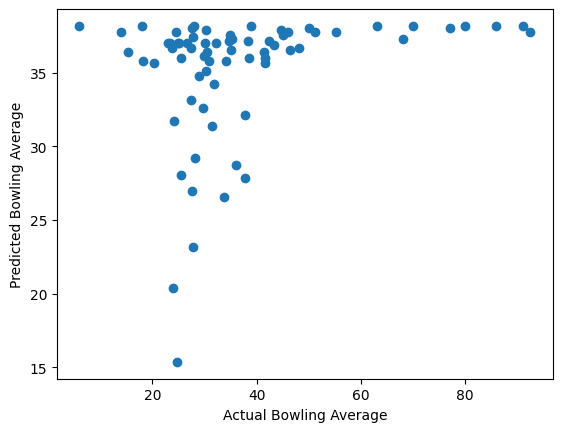

[[15.37697536]
 [37.1422078 ]
 [32.14208683]
 [38.17164447]
 [36.99514542]
 [29.20083921]
 [38.17164447]
 [26.55371634]
 [38.02458209]
 [31.70089969]
 [37.73045732]
 [36.40689589]
 [35.81864637]
 [37.43633256]
 [37.73045732]
 [37.8775197 ]
 [36.99514542]
 [37.73045732]
 [33.1715235 ]
 [36.55395827]
 [38.17164447]
 [37.73045732]
 [35.08333446]
 [38.17164447]
 [37.8775197 ]
 [37.73045732]
 [37.1422078 ]
 [34.20096017]
 [35.96570875]
 [36.99514542]
 [28.02434016]
 [35.81864637]
 [36.84808303]
 [36.99514542]
 [36.99514542]
 [38.17164447]
 [35.67158398]
 [36.11277113]
 [37.73045732]
 [36.70102065]
 [31.40677493]
 [26.99490349]
 [37.58339494]
 [38.02458209]
 [38.17164447]
 [38.17164447]
 [35.96570875]
 [37.1422078 ]
 [38.17164447]
 [27.87727777]
 [28.75965206]
 [23.17128157]
 [36.40689589]
 [37.28927018]
 [36.70102065]
 [34.7892097 ]
 [32.58327398]
 [38.02458209]
 [38.17164447]
 [35.96570875]
 [36.40689589]
 [36.70102065]
 [35.81864637]
 [20.37709633]
 [36.55395827]
 [37.28927018]
 [36.99514

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# load the IPL dataset
ipl_data = pd.read_csv('deliveries.csv')

# filter out rows where dismissal_kind is 'run out'
wicket_data = ipl_data.loc[ipl_data.dismissal_kind != 'run out']

# create a new DataFrame with total runs and wickets by bowler
bowling_stats = wicket_data.groupby('bowler').agg({'total_runs': 'sum', 'player_dismissed': 'count'})

# rename the columns to more meaningful names
bowling_stats = bowling_stats.rename(columns={'player_dismissed': 'wickets'})

# filter out rows where wickets is zero
bowling_stats = bowling_stats.loc[bowling_stats.wickets != 0]

# calculate the bowling average
bowling_stats['bowling_avg'] = bowling_stats['total_runs'] / bowling_stats['wickets']

# split the data into training and testing sets
X = bowling_stats['wickets'].values.reshape(-1, 1)
y = bowling_stats['bowling_avg'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predict the bowling average for the test data
y_pred = model.predict(X_test)

# plot a scatter plot of y_test vs. y_pred
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Bowling Average')
plt.ylabel('Predicted Bowling Average')
plt.show()

print(y_pred)

# print the model coefficients and R-squared value
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('R-squared:', model.score(X_test, y_test))
